In [3]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install --upgrade librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 214 kB 14.2 MB/s 
  Attempting uninstall: librosa
    Found existing installation: librosa 0.8.1
    Uninstalling librosa-0.8.1:
      Successfully uninstalled librosa-0.8.1


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pydub import AudioSegment
import librosa
from IPython.display import Audio
from IPython.display import display
import librosa.display

In [8]:
import spacy
from spacy import displacy

In [10]:
!gdown 17owUgoHAMPFiWqXfVRZJ7Yx8kgrZfyGb
!gdown 17mee7IPhFO3uQrQUHuVdnufRDGd_uUYa

Downloading...
From: https://drive.google.com/uc?id=17owUgoHAMPFiWqXfVRZJ7Yx8kgrZfyGb
To: /content/ais_messages.parquet.gzip
100% 2.63M/2.63M [00:00<00:00, 203MB/s]
Downloading...
From: https://drive.google.com/uc?id=17mee7IPhFO3uQrQUHuVdnufRDGd_uUYa
To: /content/meta_messages.parquet.gzip
100% 146k/146k [00:00<00:00, 98.1MB/s]


In [11]:
df1 = pd.read_parquet('meta_messages.parquet.gzip')

In [12]:
df1.head()

mmsi       name  shiptype callsign      destination  postype  \
0  273210370      ANTEY        52      SSD            RUVYS        1   
1  538003798   ALETHINI        70    V7TG4  HOLMSUND,SWEDEN        1   
2  218861000    ALSTERN        70    DDZU2            GBHUL        1   
3  230987390      FALCO        60  OI 7119         PROSTVIK        1   
4  230980760  SUMMERSEA        60  OG-8046        BENGTSKAR        1   

                    timestamp      imo  draught          eta  referencepointA  \
0  2022-09-30 10:00:18.177000  9513062       55  12-02 10:00               10   
1  2022-09-30 10:00:18.330000  9217826       57  09-29 11:30              127   
2  2022-09-30 10:00:00.559000  9347073       52  10-04 14:00               75   
3  2022-09-30 10:00:01.029000  8685741       42  02-10 10:30               26   
4  2022-09-30 10:00:01.131000  8035025       18  09-17 12:30               12   

   referencepointB  referencepointC  referencepointD  
0               20                5                7  
1               24               18                8  
2               15                8                8  
3               26                6                6  
4               18                3                3

In [13]:
df1['name'].unique()

array(['ANTEY', 'ALETHINI', 'ALSTERN', 'FALCO', 'SUMMERSEA', 'ATTILA',
       'SUULA', 'HECTOR', 'TRUVOR', 'KUMMELI', 'SOUTHPORT', 'SCA OBBOLA',
       'REPLOT 2', 'AHTO- 07', 'PILOT L151', 'SANNA', 'NUNAVIK',
       'FINNPULP', 'BITLAND', 'BIRKA STOCKHOLM', 'VIOLETTA', 'CARELIA',
       'GUDINGEN', 'MERILUOTO', 'SEAGARD', 'AQUILA', 'KOKAR', 'AHTO-20',
       'GAZPROMNEFT NORDWEST', 'PRIMA KING', 'SVANHILD', 'KONTIO',
       'SUOMENLINNA II', 'AHTO-03', 'QUEEN R', 'PUSKU4', 'STELLA',
       'TOFTO 123', 'MERIKARHU', 'CRYSTALWATER', 'FINLANDIA',
       'LADY DEMET', 'TINTO', 'YASA SPARROW', 'RYURIK', 'HALLI',
       'DELPHIS GDANSK', 'PILOT L244', 'MEROPE', 'LEOPARD ', 'DALSLAND',
       'SISU', 'SYMPHONY SEA', 'MT3319', 'APOLLON', 'ACACIA RUBRA',
       'ELENA L', 'VILLE 2', 'AMUR STAR', 'SIMSKALA', 'OLLI',
       'CHERNOMORETZ-25', 'VENICE A', 'OILI 3', 'NASSAUBORG', 'NIKLAS',
       'BALT FLOT 6', 'VIGGEN', 'DOPPINGEN', 'SILVA', 'FISKO',
       'VELIKIY NOVGOROD', 'KAITA', 'RJO 1484'

In [14]:
df1['shiptype'].unique()

array([52, 70, 60, 56, 80, 54, 50, 36, 90, 34, 31, 51, 33,  0, 35, 20, 53,
       38, 40, 32, 59, 37, 55])

In [15]:
df2 = pd.read_parquet('ais_messages.parquet.gzip')

In [16]:
df2.head()

mmsi  longitude   latitude  sog    cog  navstat  rot  posacc   raim  \
0  230111080  26.963547  60.461573  0.0  148.4        0    0    True  False   
1  230018360  26.961805  60.461407  0.0  292.6        0    0   False  False   
2  230982380  28.657770  62.144077  0.0  191.8       15 -128   False  False   
3  230046580  19.934068  60.080667  0.0    0.0        0    0    True   True   
4  230061400  20.088592  60.375135  0.0  276.7        0 -128   False   True   

   heading  timestamp          external timestamp  
0      223         60  2022-09-30 10:00:00.048000  
1      295          0  2022-09-30 10:00:00.099000  
2      511         59  2022-09-30 10:00:00.099000  
3      352          0  2022-09-30 10:00:00.099000  
4      511         60  2022-09-30 10:00:00.150000

In [17]:
df2.tail()

mmsi  longitude   latitude   sog    cog  navstat  rot  posacc  \
140252  209732000  24.988660  59.795467  10.9   79.3        0    0   False   
140253  265604520  18.447350  60.340850   0.0  171.9        0 -128   False   
140254  230981050  25.195277  65.008867   0.0  261.0        0    0    True   
140255  230111080  26.963555  60.461568   0.0  266.2        0    0    True   
140256  230011290  24.622100  65.229378   0.0  273.3        0    0   False   

         raim  heading  timestamp          external timestamp  
140252  False       78         59  2022-09-30 10:59:59.881000  
140253  False      511          0  2022-09-30 10:59:59.881000  
140254  False      107         59  2022-09-30 10:59:59.932000  
140255  False      222         60  2022-09-30 10:59:59.932000  
140256  False      163         60  2022-09-30 10:59:59.932000

In [18]:
!gdown 1AdjouICsaAQqq3yvg4RV9D07MJOCZpXE

Downloading...
From: https://drive.google.com/uc?id=1AdjouICsaAQqq3yvg4RV9D07MJOCZpXE
To: /content/US.mp3
100% 1.25G/1.25G [00:07<00:00, 177MB/s]


In [19]:
#importing file from location by giving its path
sound = AudioSegment.from_mp3("US.mp3")


<_io.BufferedRandom name='portion.mp3'>

In [25]:
#Selecting Portion we want to cut
StrtMin = 20
StrtSec = 0
EndMin = 25
EndSec = 0
# Time to milliseconds conversion
StrtTime = StrtMin*60*1000+StrtSec*1000
EndTime = EndMin*60*1000+EndSec*1000
# Opening file and extracting portion of it
extract = sound[StrtTime:EndTime]
# Saving file in required location
extract.export(f"US_{StrtMin}-{EndMin}.mp3", format="mp3")
# new file portion.mp3 is saved at

<_io.BufferedRandom name='US_20-25.mp3'>

In [14]:
sound_file = 'portion.mp3'
wn = Audio(sound_file, autoplay=False)
display(wn)

/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


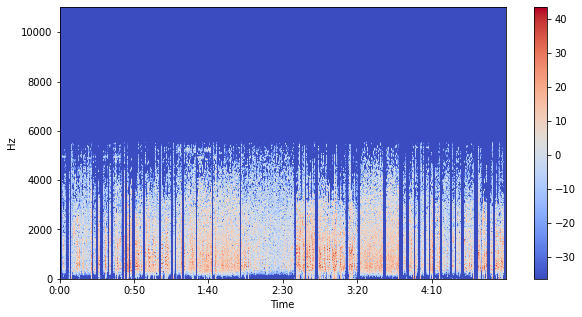

In [15]:
audio = 'portion.mp3'
x, sr = librosa.load(audio)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize = (10, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

In [35]:
!pip install git+https://github.com/openai/whisper.git -q

     |████████████████████████████████| 5.5 MB 13.8 MB/s 
     |████████████████████████████████| 7.6 MB 57.4 MB/s 
     |████████████████████████████████| 163 kB 73.1 MB/s 


In [36]:
import whisper

model = whisper.load_model("small")


100%|████████████████████████████████████████| 461M/461M [00:03<00:00, 153MiB/s]


In [37]:
model.device

device(type='cuda', index=0)

In [34]:
!git clone https://github.com/petewarden/openai-whisper-webapp

Cloning into 'openai-whisper-webapp'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 29 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [26]:
def transcribe(audio):
    
    # load audio and pad/trim it to fit 30 seconds
    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    # make log-Mel spectrogram and move to the same device as the model
    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    # detect the spoken language
    _, probs = model.detect_language(mel)
    print(f"Detected language: {max(probs, key=probs.get)}")

    # decode the audio
    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    return result.text

In [26]:
sound_file = 'portion.mp3'
wn = Audio(sound_file, autoplay=False)
display(wn)

In [28]:
easy_text = transcribe("portion.mp3")
print(easy_text)

Detected language: en
Okay, we'll see in a few. Security, security, efficient metal 75 inbound from Point Judith, Harbor Refuge, about a half a mile from the West Gap. Any concerns, traffic, stand by, jam 16-13, 75. To me, a little wiggle, Roger. I gave them on my way.


In [30]:
text = model.transcribe('portion.mp3')
print(text)

{'text': " Okay, we'll see in a few. Security, security, efficient metal 75 inbound from Point Judith, Harbor Refuge, about a half a mile from the West Gap. Any concerns, Travis, stand by, channel 1630, 75. To me, a little wiggle, Roger. I gave him all my wax. Okay, they still have the ladder, I guess. Okay, good. Come on down. Okay, I'll get it, I'll let it off, I'll let it clear. Thank you, good night. Yeah, coming out 15. I'll let, I'll let, I'll let, photo vessel, very okay, coming. It's photo vessel, very okay. I report to you my ETI rule of pilot station 0300 local town. The same pilot ladder on the sports side and the speed sheet is nice. Goodbye. Pilot, notice pilot, runway 40 knots. Pilot's ladder 45, 4 meters, 46, 5 meters. Pilot, sorry, but thank you, sir. 4, 340 feet, 9 knots. Pilot, all the course is 340 feet, 9 knots. Roger. Roger. Roger. Roger. Pilot, Peter Sip cornersglacier. The RQM is a wind-floating force. All pointers are equipped with the technology for the area to

In [40]:
text = []
for i in range(5):
  sound_file = f'US_{i*5}-{(i+1)*5}.mp3'
  print(sound_file)
  wn = Audio(sound_file, autoplay=False)
  display(wn)
  text.append(model.transcribe(sound_file))
  print(text[-1]['text'])

US_0-5.mp3


 good. Good evening. Portside Ladder. Okay. We'll see in a few. Security, security, efficient metal 75 inbound from Point Judith, Harbor Refuge, about a half a mile from the West Gap. And you're concerned traffic is being invited to 1630s 75. To me, a little wiggle, Roger. Okay, if I'm on my way. Okay. They still have the ladder. Good. Come on down. Okay. Highlight off. Highlight off. Highlight off. It's clear. Thank you. Good night. Do you hear me? I got me on 15. Highlight. Highlight. Highlight. Auto-vascular. Okay. Slowly. It's motor vessel. Are you okay? I report to you my ETI-2 of Pilot Station 0300 local town. The same Pilot ladder on the Portside and the speed sheet is nice. Goodbye. Pilot, notice, pilot, runway 40 knots. Pilot's ladder 45, 4m, 46, 5m, 5m, 4, 3, 4, 0, speed 99. Pilot, auto-vascular, 3, 4, 0, speed 9 knots. Roger. Okay. Okay. Okay. Okay. Okay. Okay. Okay. Thank you. Okay. Okay. Okay. You are pretty good. This is United Coast Guard on channel 16. Over. This is Uni

 You give me the description of your vessel including link made in color over. You give me the link of the vessel over. Is there a person on board the vessel have personal floatation devices on board over? Do you have them on? Right Captain, do you have the guys have life jackets on over? Do you have any command show assistant provider over? Is there a person on board the vessel over? Captain, do you have a phone number that we can contact you over? Do you give me your name over? We're going to be contacting you via line line. I'll call you over. Here. Coast Guard 292, new 6th civilization out of view. Loud and clear. I'm going to go over. Yes, sir. Mr. Marco. We have a full paces done. Thank you. I'm on. I'm on. Alright, we'll see you in a minute. 40 pilots 1010. Yes, sir. You are still on time for 10 hundred, is that correct over? Eight of the pilot station is still 10 hundred one zero zero zero, correct over? Very well. Pilot on arrival, it will be a starboard side boarding, 1.5 met

 This is the Coast Guard, this is Coast Guard sector south, he is on channel 16, over. Coast Guard, this is the sector south, he is on the STG 222, over. This is the Coast Guard, to request to know your future intention, follow up over. Very captain, this is the Coast Guard, to request to call FDL 9, let me know when you are ready to copy the phone number over. Phone number is 5808 457 3211 5808 457 3211, over. The VIA channel 16, please come out. He goes off, I'm going to pilot, I'm going to pilot. The pilot, pilot, he goes off. I'm about 16.0, over, please. Thank you. Captain, this is Northeast Pilots, we have a pilot for you at 1600 over. Yes, this is the FDL, to pilot. What side are you set up on? I'm about to make a travel start here, we are about to go to the pilot's corner. Copy that, pilot on arrival 1600, we'll get in touch with you when we're underway, over. Yes, this is the FDL, to pilot at 1600. Standby 16 and 1010 working channel. WJANA, so Ihrilly 6 Public 보이ips towards t

 What is your GPS position in your optical location? Over. This is the Coast Guard, this is the Coast Guard sector, Lone Island Sound. Come back captain. This is the middle wave, this is the Coast Guard sector, Lone Island Sound, each one of them is reached back captain. This is the middle wave, this is the Coast Guard sector, Lone Island Sound, each one of them is reached back captain. This is the middle wave, this is the Coast Guard sector, Lone Island Sound, each one of them is reached back captain. Okay, this looks like we need to find the place down quite a lot. Please repeat the back check professional procedure. Secure that, secure that, secure that all stations is the United States Coastal Sector Long and Assault, United States Coastal Sector Long and Assault. Good to go more information with blood cast concerning, as the American vessel has made the entrance of the Zag Harbor, taking tower to the Alfa, we're going to do one by seven between one area and the other. Secure that 

 We'll get further in a few minutes. Security, security, security, all stations, this is United States Coast Guard sector, Long Island South, United States Coast Guard sector, Long Island South. Coast Guard, more information, broadcast concerning a submerged vessel near the entrance of Sack Harbor. There's a chance that the Alpha frequency 157 is from one area south. Security, security, all stations, this is United States Coast Guard sector, Long Island South. The Coast Guard receiver is board of a vessel that is submerged in vicinity of Sack Harbor entrance in a breath position. 4-1, taxi 01, 70-8 to north, 072, taxi 18, 70-00 west. All mariners are requested to use caution when transit is in area. This is United States Coast Guard sector, Long Island South, United States Coast Guard sector, Long Island South. Hello all stations, hello all stations, hello all stations, this is United States Coast Guard sector, Long Island South. This is United States Coast Guard sector, Long Island So

In [41]:
!spacy download en_core_web_sm
!spacy download en

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 14.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.4.1/en_core_web_sm-3.4.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [42]:
NER = spacy.load("en_core_web_sm")

In [46]:
for t in text:
  tt = t['text']  
  ntt = NER(tt)
  displacy.render(ntt, style="ent", jupyter=True)

  print()